In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import wbgapi as wb

pd.options.display.float_format = '{:,.2f}'.format

In [3]:
wb.series.info(q="gdp") # find dworld bank data by search term and ind the ID

id,value
EG.GDP.PUSE.KO.PP,GDP per unit of energy use (PPP $ per kg of oil equivalent)
EG.GDP.PUSE.KO.PP.KD,GDP per unit of energy use (constant 2017 PPP $ per kg of oil equivalent)
EG.USE.COMM.GD.PP.KD,"Energy use (kg of oil equivalent) per $1,000 GDP (constant 2017 PPP)"
NY.GDP.DEFL.KD.ZG,"Inflation, GDP deflator (annual %)"
NY.GDP.DEFL.KD.ZG.AD,"Inflation, GDP deflator: linked series (annual %)"
NY.GDP.DEFL.ZS,GDP deflator (base year varies by country)
NY.GDP.DEFL.ZS.AD,GDP deflator: linked series (base year varies by country)
NY.GDP.DISC.CN,Discrepancy in expenditure estimate of GDP (current LCU)
NY.GDP.DISC.KN,Discrepancy in expenditure estimate of GDP (constant LCU)
NY.GDP.MKTP.CD,GDP (current US$)


In [104]:
# metadata = wb.series.metadata.get(indicator_code) # load metadata
metadata

Field,Value
Aggregationmethod,Weighted average
IndicatorName,"GDP per capita, PPP (current international $)"
License_Type,CC BY-4.0
License_URL,https://datacatalog.worldbank.org/public-licenses#cc-by
Longdefinition,"This indicator provides per capita values for gross domestic product (GDP) expressed in current international dollars converted by purchasing power parity (PPP) conversion factor. GDP is the sum of gross value added by all resident producers in the country plus any product taxes and minus any subsidies not included in the value of the products. conversion factor is a spatial price deflator and currency converter that controls for price level differences between countries. Total population is a mid-year population based on the de facto definition of population, which counts all residents regardless of legal status or citizenship."
Periodicity,Annual
Source,"International Comparison Program, World Bank | World Development Indicators database, World Bank | Eurostat-OECD PPP Programme."
Statisticalconceptandmethodology,"Typically, higher income countries have higher price levels, while lower income countries have lower price levels (Balassa-Samuelson effect). Market exchange rate-based cross-country comparisons of GDP at its expenditure components reflect both differences in economic outputs (volumes) and prices. Given the differences in price levels, the size of higher income countries is inflated, while the size of lower income countries is depressed in the comparison. PPP-based cross-country comparisons of GDP at its expenditure components only reflect differences in economic outputs (volume), as PPPs control for price level differences between the countries. Hence, the comparison reflects the real size of the countries. For more information on underlying GDP in current international dollar, please refer to the metadata for ""GDP, PPP (current international $)"" [NY.GDP.MKTP.PP.CD]. For more information on underlying population, please refer to the metadata for ""total population” [SP.POP.TOTL]. For the concept and methodology of PPP, please refer to the International Comparison Program (ICP)’s website (https://www.worldbank.org/en/programs/icp)."
Topic,Economic Policy & Debt: Purchasing power parity


In [98]:
def get_gdp_df():
    
    pd.options.display.float_format = '{:,.2f}'.format

    indicator_code = "NY.GDP.PCAP.PP.CD"
    metadata = wb.series.metadata.get(indicator_code) # load metadata
    gdp_ppp = wb.data.DataFrame(indicator_code, 
                                ['AFR',
                                'MEA', 
                                'NAC',
                                'EUU',
                                'SAS',
                                ],
                                range(1990, 2024, 1)) 

    gdp_ppp.columns = [col.replace("YR", "") for col in gdp_ppp.columns]
    gdp_ppp.reset_index(inplace=True)

    df = gdp_ppp.melt(
        id_vars="economy", var_name="Year", value_name="gdp (ppp) per capita"
    ).sort_values("economy")

    df.columns = ["Economy", "Year", "GDP (PPP) per capita"]

    return df, metadata

df, metadata = get_gdp_df()
df

,Economy,Year,GDP (PPP) per capita
0,EUU,1990,"14,825.22"
24,EUU,1996,"18,349.31"
92,EUU,2013,"36,064.85"
28,EUU,1997,"19,067.47"
88,EUU,2012,"34,965.18"
...,...,...,...
71,SAS,2007,"3,420.33"
107,SAS,2016,"5,519.56"
31,SAS,1997,"1,794.97"
75,SAS,2008,"3,547.94"


<Axes: title={'center': 'GDP (PPP current $) per capita.'}, xlabel='Year'>

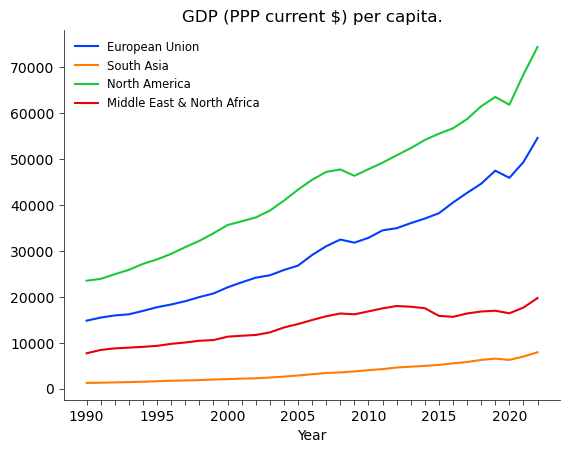

In [70]:
def gdp_plot():
    df, metadata = get_gdp_df()
    ax = sns.lineplot(
        data=df.sort_values("Year"),
        x="Year",
        y="GDP (PPP) per capita",
        hue="Economy",
        palette="bright",
    )

    # Customize plot
    ax.spines["right"].set_visible(False)
    ax.spines["top"].set_visible(False)
    spine_width = 0.5

    for spine in ax.spines.values():
        spine.set_linewidth(spine_width)
    ax.tick_params(axis="both", width=spine_width)
    for ind, label in enumerate(ax.get_xticklabels()):
        label.set_visible(ind % 5 == 0)

    # Get handles and labels for the legend
    handles, labels = ax.get_legend_handles_labels()

    # Replace region codes with region names in legend labels
    for i, label in enumerate(labels):
        region_name = get_region(label)
        labels[i] = region_name

    # Update legend with modified labels
    ax.legend(
        handles,
        labels,
        loc="best",
        fontsize="small",
        frameon=False,
        fancybox=False,
    )

    ax.set_title("GDP (PPP current $) per capita.")
    ax.set_xlabel("Year")
    ax.set_ylabel("")
    return ax


gdp_plot()

In [60]:
region_df = pd.DataFrame(wb.region.info().items)


# rename region code to propper region name
def get_region(code):
    region = region_df.loc[region_df['code'] == code, 'name'].iloc[0]
    return region

get_region('AFE')

'Africa Eastern and Southern'

In [72]:
metadata

Field,Value
Aggregationmethod,Weighted average
IndicatorName,"GDP per capita, PPP (current international $)"
License_Type,CC BY-4.0
License_URL,https://datacatalog.worldbank.org/public-licenses#cc-by
Longdefinition,"This indicator provides per capita values for gross domestic product (GDP) expressed in current international dollars converted by purchasing power parity (PPP) conversion factor. GDP is the sum of gross value added by all resident producers in the country plus any product taxes and minus any subsidies not included in the value of the products. conversion factor is a spatial price deflator and currency converter that controls for price level differences between countries. Total population is a mid-year population based on the de facto definition of population, which counts all residents regardless of legal status or citizenship."
Periodicity,Annual
Source,"International Comparison Program, World Bank | World Development Indicators database, World Bank | Eurostat-OECD PPP Programme."
Statisticalconceptandmethodology,"Typically, higher income countries have higher price levels, while lower income countries have lower price levels (Balassa-Samuelson effect). Market exchange rate-based cross-country comparisons of GDP at its expenditure components reflect both differences in economic outputs (volumes) and prices. Given the differences in price levels, the size of higher income countries is inflated, while the size of lower income countries is depressed in the comparison. PPP-based cross-country comparisons of GDP at its expenditure components only reflect differences in economic outputs (volume), as PPPs control for price level differences between the countries. Hence, the comparison reflects the real size of the countries. For more information on underlying GDP in current international dollar, please refer to the metadata for ""GDP, PPP (current international $)"" [NY.GDP.MKTP.PP.CD]. For more information on underlying population, please refer to the metadata for ""total population” [SP.POP.TOTL]. For the concept and methodology of PPP, please refer to the International Comparison Program (ICP)’s website (https://www.worldbank.org/en/programs/icp)."
Topic,Economic Policy & Debt: Purchasing power parity


In [8]:
mil_con

,Country,2000,2001,2002,2003,2004,2005,2006,2007,2008,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,United States of America,"503,680.10","507,770.80","570,129.60","648,901.60","707,251.00","739,826.20","750,486.90","770,512.70","826,562.70",...,"790,061.90","741,463.50","724,625.90","722,402.30","714,959.10","736,477.50","778,326.90","814,965.20","806,230.20","811,591.20"
1,China,"45,586.10","54,052.90","62,082.20","67,187.90","74,005.60","81,267.80","93,544.50","102,829.80","112,507.10",...,"183,362.60","197,998.80","213,542.40","225,835.10","239,724.30","253,766.40","266,129.30","278,673.30","285,930.50","297,999.00"
2,Russia,"22,839.80","24,683.00","27,343.60","28,670.80","29,967.10","34,054.90","37,693.60","41,029.60","45,082.30",...,"62,586.20","67,075.10","72,293.50","77,501.70","62,801.20","60,435.00","63,143.90","64,627.40","65,907.70","71,981.10"
3,France,"48,554.40","48,404.70","49,399.20","50,889.30","52,278.60","51,207.10","51,443.00","51,423.60","51,049.90",...,"49,573.00","50,435.80","51,815.50","53,824.50","54,532.60","53,187.30","54,066.00","55,623.20","56,647.00","56,999.70"
4,Germany,"46,431.40","45,668.20","45,792.40","45,166.60","43,783.00","36,489.50","42,138.70","42,203.20","43,201.00",...,"43,618.90","43,670.60","44,420.50","46,348.10","47,677.50","48,993.20","53,742.50","57,056.10","56,513.10","57,807.70"
5,Iran,"2,525.20","2,811.10","3,025.80","3,531.60","4,563.70","5,426.80","6,498.00","5,975.30","5,748.60",...,"4,428.70","4,415.70","4,695.10","5,390.10","6,064.60","5,130.70","4,213.10","4,246.70","5,392.00","5,639.70"
6,Israel,"14,216.20","14,811.90","14,817.70","14,573.70","15,060.50","15,432.80","15,667.00","17,567.10","17,790.40",...,"18,570.10","19,990.90","20,278.00","21,351.30","22,265.20","22,535.70","22,671.40","23,611.00","24,341.00","23,308.20"
7,Türkiye,"10,801.80","9,902.20","10,535.90","9,798.00","9,105.30","8,775.90","9,186.40","8,857.70","8,985.20",...,"10,022.30","10,095.40","10,388.20","12,179.50","13,072.50","16,592.60","17,638.40","16,603.20","15,567.40","11,515.60"


In [121]:
def get_mil_spending_data():
    mil_con = pd.read_csv("./data/milspending.csv")
    mil_melt = mil_con.melt(id_vars='Country',var_name='Year', value_name='Military Spending in constant $').sort_values('Year')
    return mil_melt

mil_melt = get_mil_spending_data()
mil_melt

,Country,Year,Military Spending in constant $
0,United States of America,2000,"503,680.10"
1,China,2000,"45,586.10"
2,Russia,2000,"22,839.80"
3,France,2000,"48,554.40"
4,Germany,2000,"46,431.40"
...,...,...,...
182,Israel,2022,"23,308.20"
177,China,2022,"297,999.00"
176,United States of America,2022,"811,591.20"
178,Russia,2022,"71,981.10"


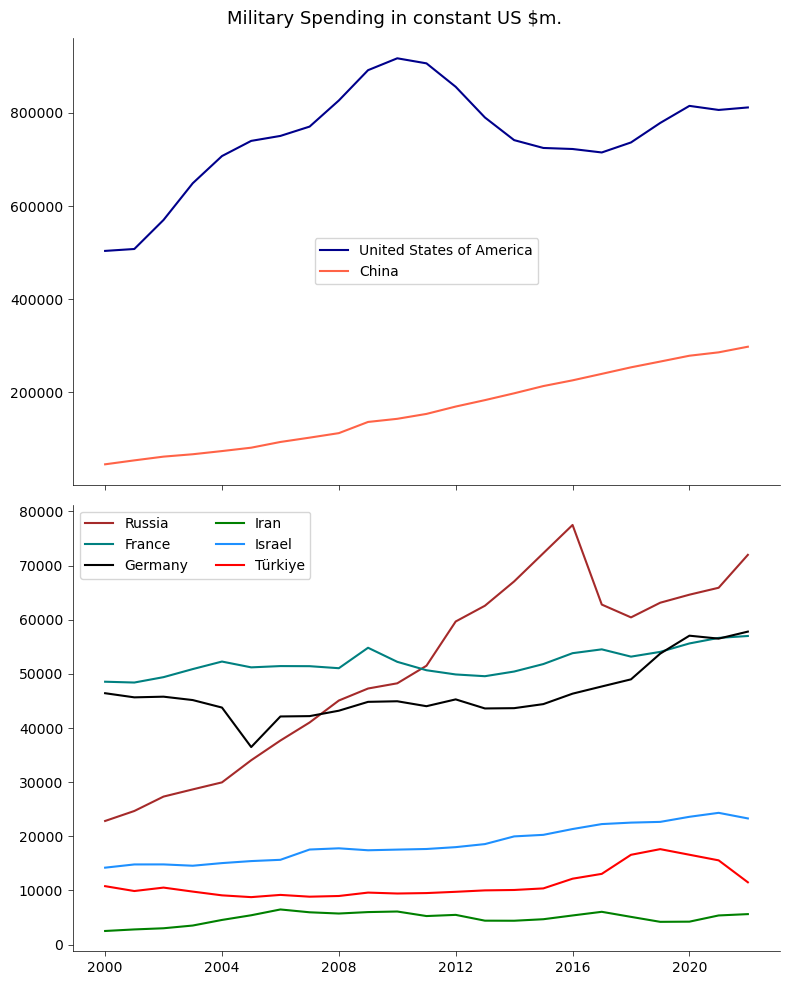

In [120]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

mil_con = pd.read_csv("./data/milspending.csv")
mil_melt = mil_con.melt(id_vars='Country',var_name='Year', value_name='Military Spending in constant $').sort_values('Year')

# Combine data for China and US
us_china_data = mil_melt[mil_melt["Country"].isin(["United States of America", "China"])]

# Data for other countries
other_data = mil_melt[~mil_melt["Country"].isin(["United States of America", "China"])]

# Define a custom color palette for each country
colors = {
    "United States of America": "darkblue",
    "China": "tomato",
    "Germany": "black",
    "Iran": "g",
    "Türkiye": "r",
    "France": "teal",
    "Israel": "dodgerblue",
    "Russia": "brown"
}


# Create subplots
fig, axes = plt.subplots(2, 1, figsize=(8, 10), sharex=True)

# Plot for China and US
sns.lineplot(
    data=us_china_data,
    x="Year",
    y="Military Spending in constant $",
    hue="Country",
    palette=colors,
    ax=axes[0],
)
axes[0].legend().set_title(None)  # Remove legend title
axes[0].legend(loc='center', frameon=True)  # Set legend location to 'best' and turn off frame
axes[0].spines["right"].set_visible(False)
axes[0].spines["top"].set_visible(False)
axes[0].set_ylabel("")
    
    
spine_width = 0.5
for spine in axes[0].spines.values():
    spine.set_linewidth(spine_width)
axes[0].tick_params(axis="both", width=spine_width)

# Plot for other countries
sns.lineplot(
    data=other_data,
    x="Year",
    y="Military Spending in constant $",
    hue="Country",
    palette=colors,
    ax=axes[1],
)
axes[1].legend().set_title(None)  # Remove legend title
axes[1].legend(loc='upper left', frameon=True, ncol=2)  # Set legend location to 'best' and two columns
axes[1].spines["right"].set_visible(False)
axes[1].spines["top"].set_visible(False)
axes[1].set_xlabel("")
axes[1].set_ylabel("")

spine_width = 0.5
for spine in axes[1].spines.values():
    spine.set_linewidth(spine_width)
axes[1].tick_params(axis="both", width=spine_width)


# Set x-axis ticks every 4th year
for ax in axes:
    ax.set_xticks(ax.get_xticks()[::2])
    
plt.suptitle("Military Spending in constant US $m.", fontsize=13)
plt.tight_layout()
plt.show()
